In [1]:
%load_ext autoreload
%autoreload 2
from util import util
import numpy as np

Using TensorFlow backend.


In [2]:
# train signals
%store -r signal_1_1_hor
%store -r signal_1_2_hor
%store -r signal_1_1_vert
%store -r signal_1_2_vert

%store -r signal_2_1_hor
%store -r signal_2_2_hor
%store -r signal_2_1_vert
%store -r signal_2_2_vert

%store -r signal_3_1_hor
%store -r signal_3_2_hor
%store -r signal_3_1_vert
%store -r signal_3_2_vert

# test signals
%store -r signal_1_3_hor
%store -r signal_1_4_hor
%store -r signal_1_5_hor
%store -r signal_1_6_hor
%store -r signal_1_7_hor
%store -r signal_1_3_vert
%store -r signal_1_4_vert
%store -r signal_1_5_vert
%store -r signal_1_6_vert
%store -r signal_1_7_vert

%store -r signal_2_3_hor
%store -r signal_2_4_hor
%store -r signal_2_5_hor
%store -r signal_2_6_hor
%store -r signal_2_7_hor
%store -r signal_2_3_vert
%store -r signal_2_4_vert
%store -r signal_2_5_vert
%store -r signal_2_6_vert
%store -r signal_2_7_vert

%store -r signal_3_3_hor
%store -r signal_3_3_vert

hor_train_long = [signal_1_1_hor, signal_1_2_hor, signal_2_1_hor, signal_2_2_hor, signal_3_1_hor, signal_3_2_hor]
vert_train_long = [signal_1_1_vert, signal_1_2_vert, signal_2_1_vert, signal_2_2_vert, signal_3_1_vert, signal_3_2_vert]

hor_train = []
for signal in hor_train_long:
    hor_train.append(signal[len(signal)//2:])
vert_train = []
for signal in vert_train_long:
    vert_train.append(signal[len(signal)//2:])

hor_test = [signal_1_3_hor, signal_1_4_hor, signal_1_5_hor, signal_1_6_hor, signal_1_7_hor,
            signal_2_3_hor, signal_2_4_hor, signal_2_5_hor, signal_2_6_hor, signal_2_7_hor,
            signal_3_3_hor]
vert_test = [signal_1_3_vert, signal_1_4_vert, signal_1_5_vert, signal_1_6_vert, signal_1_7_vert,
             signal_2_3_vert, signal_2_4_vert, signal_2_5_vert, signal_2_6_vert, signal_2_7_vert,
             signal_3_3_vert]

spectros_train_hor = [util.getSpectro(signal) for signal in hor_train]
spectros_train_vert = [util.getSpectro(signal) for signal in vert_train]

spectros_test_hor = [util.getSpectro(signal) for signal in hor_test]
spectros_test_vert = [util.getSpectro(signal) for signal in vert_test]

In [3]:
# parameters
expName = 'exp20180709_hor_vert_half'

testspecs = [
    ['1_3', 5730],
    ['1_4', 339],
    ['1_5', 1610],
    ['1_6', 1460],
    ['1_7', 7570],
    ['2_3', 7530],
    ['2_4', 1390],
    ['2_5', 3090],
    ['2_6', 1290],
    ['2_7', 580],
    ['3_3', 820]
]

### bepaal X en Y voor trainen

In [4]:
X_train = np.concatenate((np.concatenate(spectros_train_hor, axis=0),
                          np.concatenate(spectros_train_vert, axis=0)), 
                          axis=1)
print(np.shape(X_train))

Y_train = []
for spectro in spectros_train_hor:
    nr_samples = len(spectro)
    Y_train_nw = np.array([10 * (nr_samples - i) for i in range(1, nr_samples +1)])
    Y_train = np.append(Y_train, Y_train_nw)
    
print(np.shape(Y_train))

(3764, 2562)
(3764,)


## train modellen

In [5]:
layersizes = [600,300,150,25]
epochss = [100, 150]

Epoch 1/100
3764/3764 [==============================] - 3s 703us/step - loss: 25290932.9692
Epoch 2/100
3764/3764 [==============================] - 1s 183us/step - loss: 13189198.4867
Epoch 3/100
3764/3764 [==============================] - 1s 176us/step - loss: 12322255.7492
Epoch 4/100
3764/3764 [==============================] - 1s 145us/step - loss: 11742927.4346
Epoch 5/100
3764/3764 [==============================] - 1s 145us/step - loss: 11282807.4835
Epoch 6/100
3764/3764 [==============================] - 1s 145us/step - loss: 10816314.1732
Epoch 7/100
3764/3764 [==============================] - 1s 145us/step - loss: 10387298.8533
Epoch 8/100
3764/3764 [==============================] - 1s 146us/step - loss: 9922131.3007
Epoch 9/100
3764/3764 [==============================] - 1s 144us/step - loss: 9323497.0898
Epoch 10/100
3764/3764 [==============================] - 1s 148us/step - loss: 8559961.5058
Epoch 11/100
3764/3764 [==============================] - 1s 145us/step 

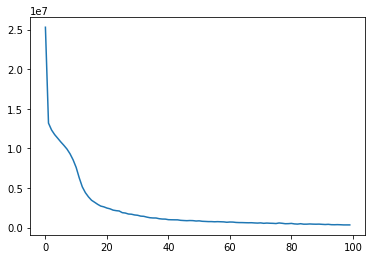

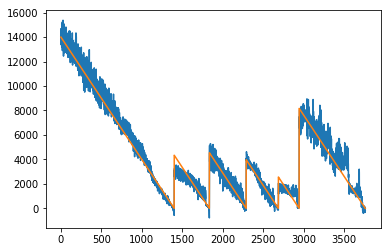

Epoch 1/150
3764/3764 [==============================] - 1s 260us/step - loss: 23704726.5760
Epoch 2/150
3764/3764 [==============================] - 1s 145us/step - loss: 12805445.4070
Epoch 3/150
3764/3764 [==============================] - 1s 158us/step - loss: 12005142.4378
Epoch 4/150
3764/3764 [==============================] - 1s 180us/step - loss: 11478764.1658
Epoch 5/150
3764/3764 [==============================] - 1s 175us/step - loss: 10972050.2168
Epoch 6/150
3764/3764 [==============================] - 1s 196us/step - loss: 10466162.0723
Epoch 7/150
3764/3764 [==============================] - 1s 154us/step - loss: 9998014.7588
Epoch 8/150
3764/3764 [==============================] - 1s 174us/step - loss: 9347523.9171
Epoch 9/150
3764/3764 [==============================] - 1s 166us/step - loss: 8471432.7991
Epoch 10/150
3764/3764 [==============================] - 1s 160us/step - loss: 7282230.4559
Epoch 11/150
3764/3764 [==============================] - 1s 163us/step -

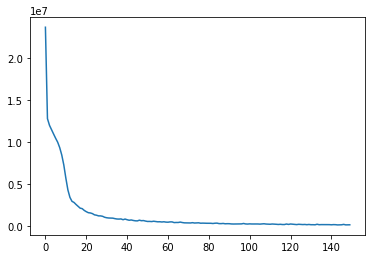

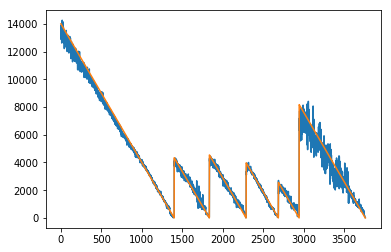

In [6]:
for epochs in epochss:
    rulModel, history = util.trainModel(X_train, Y_train, layersizes, epochs, expName)

## test modellen

##################
# Test: 1_3
##################
1802/1802 [==============================] - 0s 104us/step


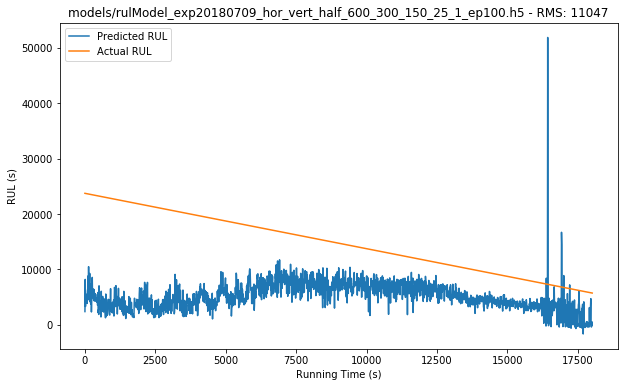

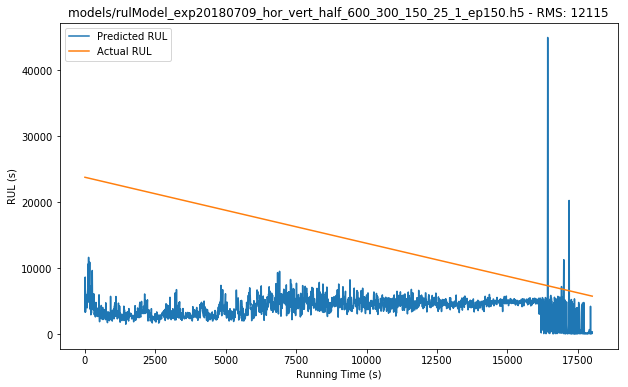

##################
# Test: 1_4
##################
1139/1139 [==============================] - 0s 185us/step


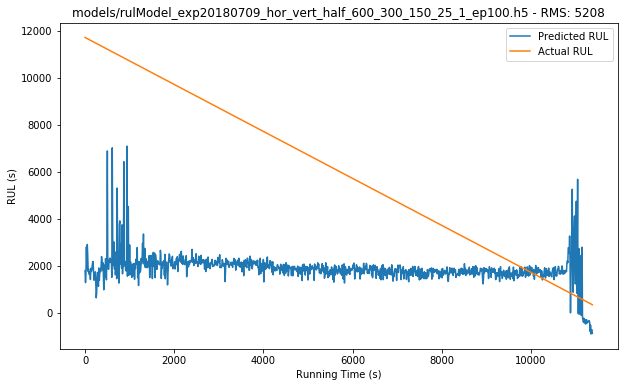

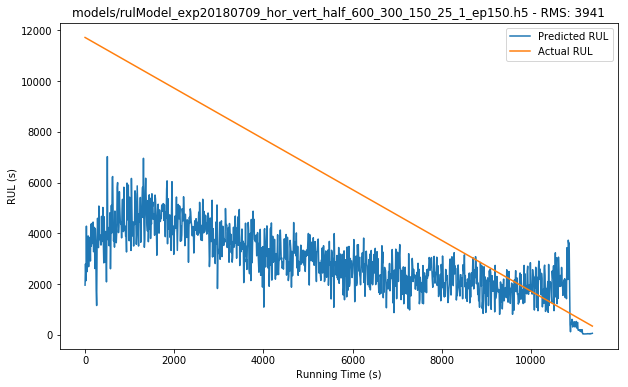

##################
# Test: 1_5
##################
2302/2302 [==============================] - 0s 139us/step


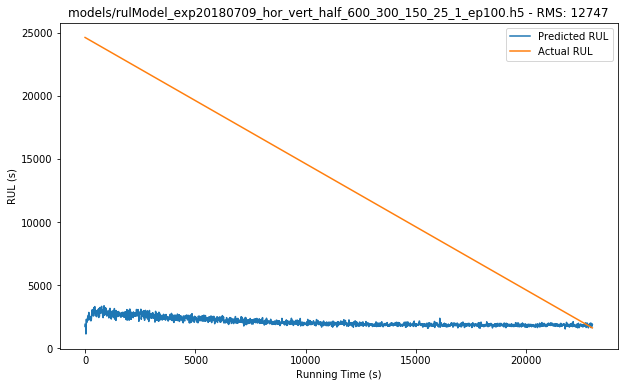

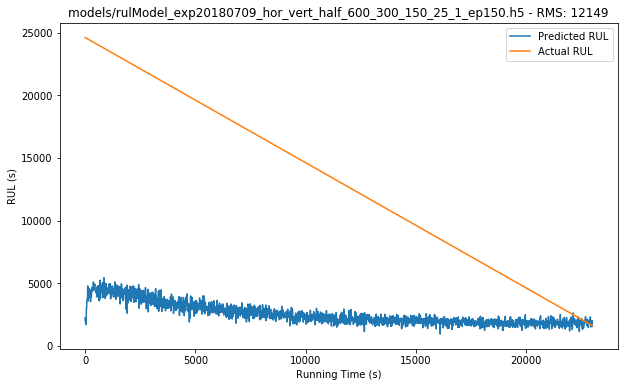

##################
# Test: 1_6
##################
2302/2302 [==============================] - 0s 163us/step


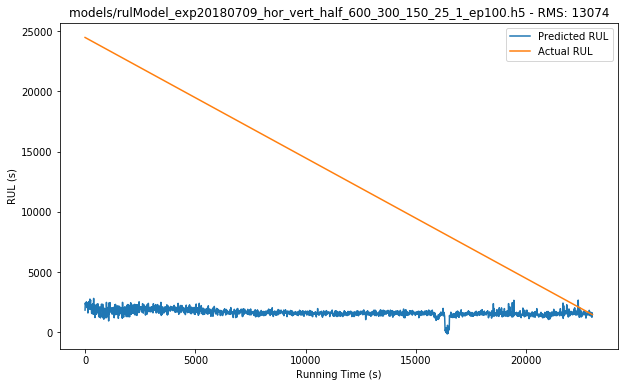

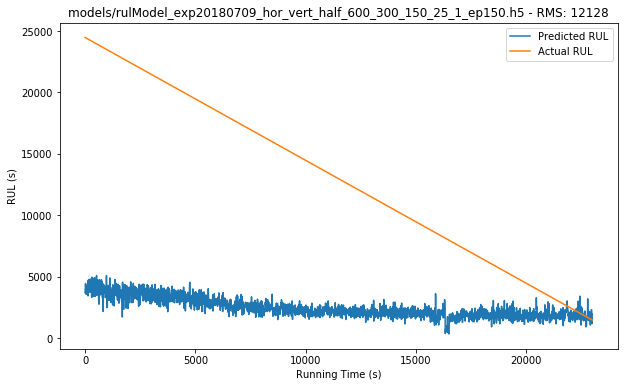

##################
# Test: 1_7
##################
1502/1502 [==============================] - 0s 242us/step


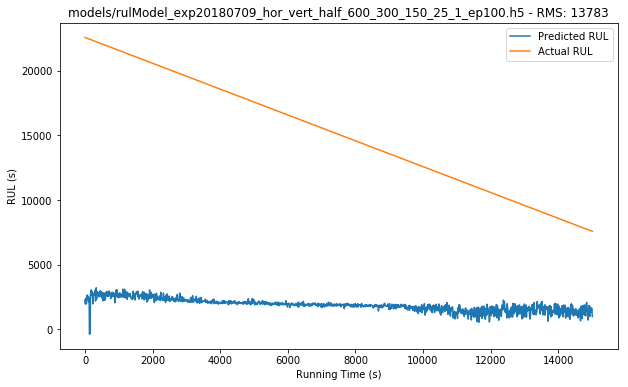

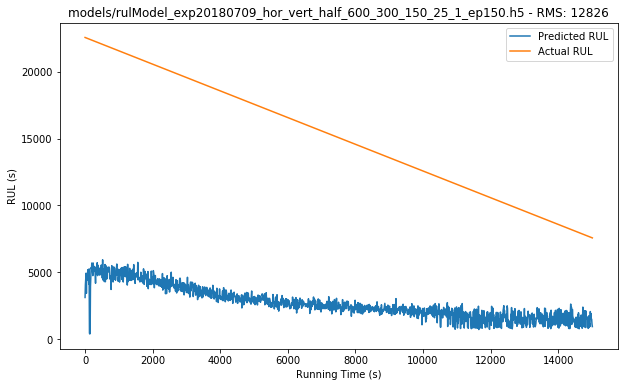

##################
# Test: 2_3
##################
1202/1202 [==============================] - 0s 292us/step


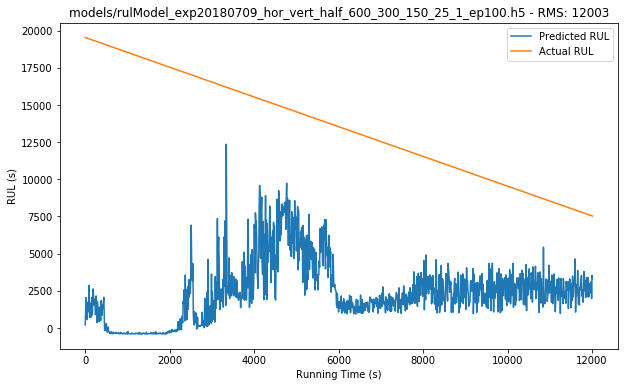

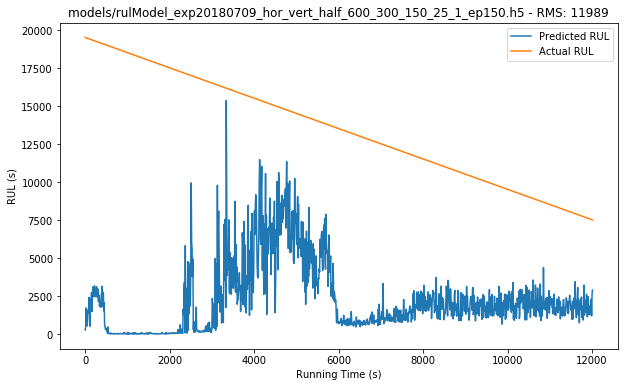

##################
# Test: 2_4
##################
612/612 [==============================] - 0s 540us/step


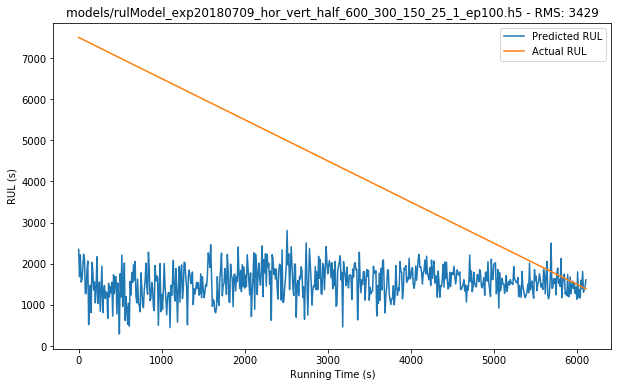

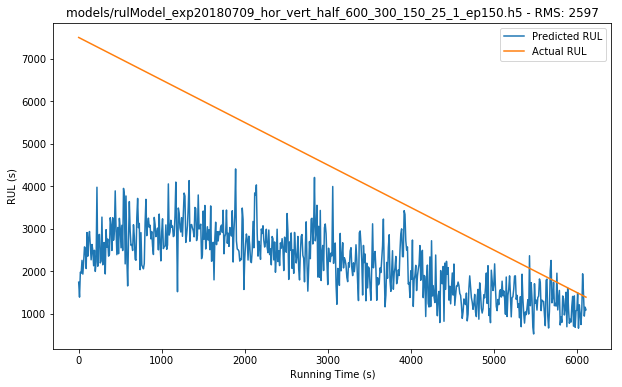

##################
# Test: 2_5
##################
2002/2002 [==============================] - 1s 265us/step


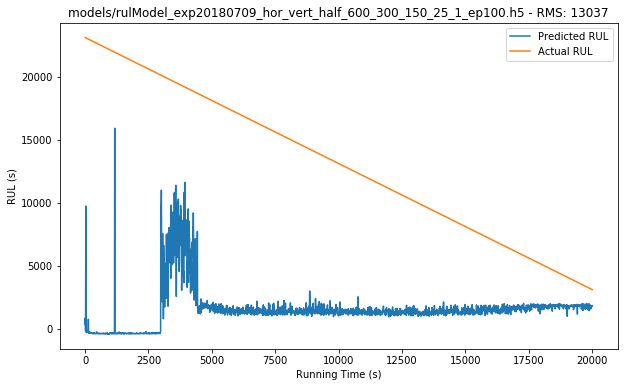

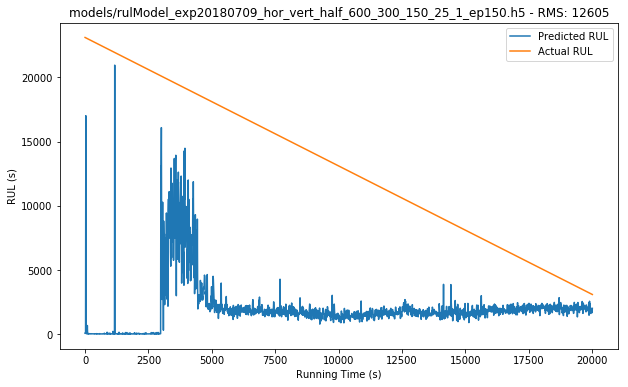

##################
# Test: 2_6
##################
572/572 [==============================] - 0s 723us/step


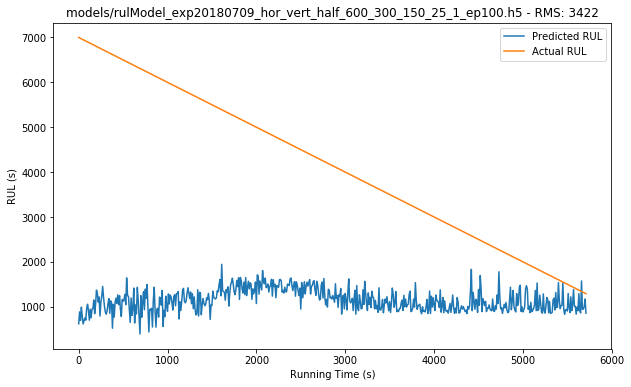

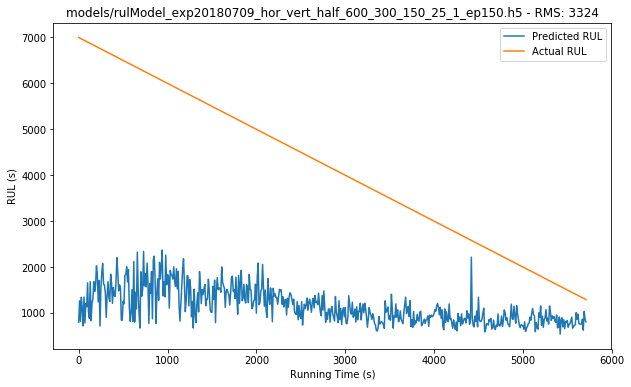

##################
# Test: 2_7
##################
172/172 [==============================] - 0s 2ms/step


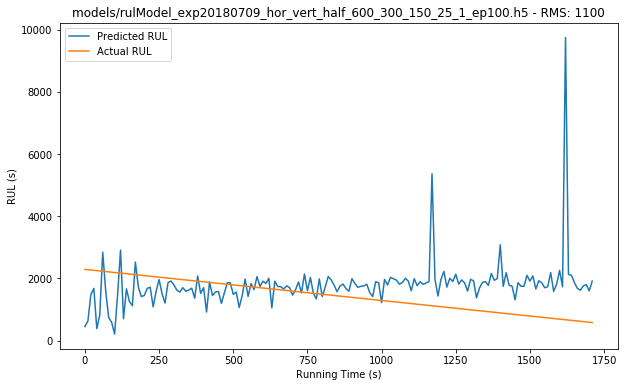

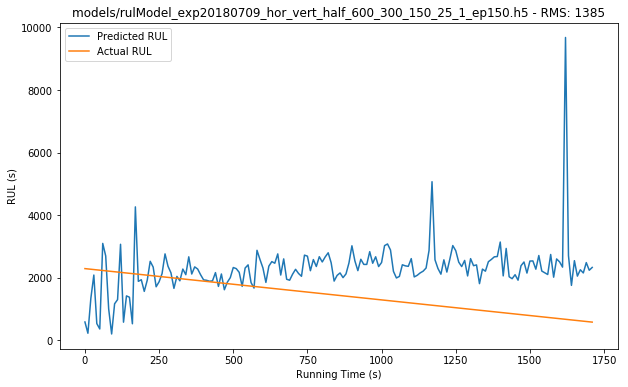

##################
# Test: 3_3
##################
352/352 [==============================] - 0s 1ms/step


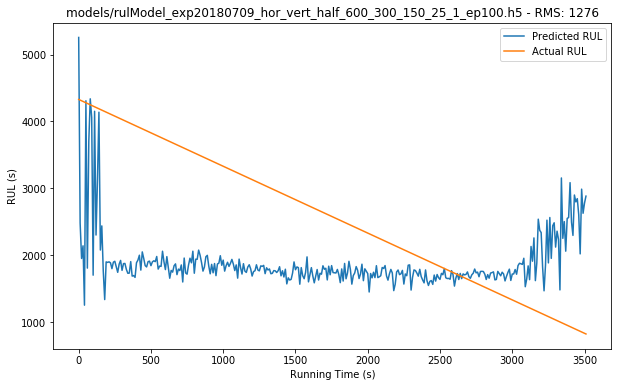

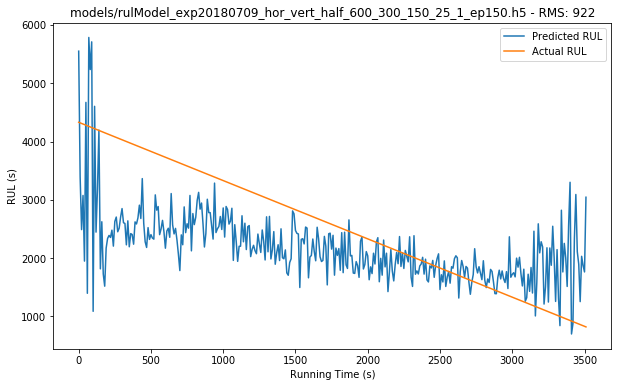

In [7]:
for testIndex in range(len(testspecs)):
    print('##################\n# Test: {:s}\n##################'.format(testspecs[testIndex][0]))
    actRUL =  testspecs[testIndex][1]
    testSpectro = np.concatenate((spectros_test_hor[testIndex], spectros_test_vert[testIndex]), axis=1)
    modelnames = [util.getModelName(layersizes, epochs, expName) for epochs in epochss]
    util.evaluate_spectro(modelnames, testSpectro, actRUL)

## andere layers

In [8]:
layersizes = [500,200,50]
epochss = [100, 150]

Epoch 1/100
3764/3764 [==============================] - 2s 540us/step - loss: 30403841.0967
Epoch 2/100
3764/3764 [==============================] - 1s 232us/step - loss: 17383781.4028
Epoch 3/100
3764/3764 [==============================] - 1s 218us/step - loss: 13434745.9963
Epoch 4/100
3764/3764 [==============================] - 1s 208us/step - loss: 12881857.4644
Epoch 5/100
3764/3764 [==============================] - 1s 195us/step - loss: 12498977.9532
Epoch 6/100
3764/3764 [==============================] - 1s 182us/step - loss: 12180616.6743
Epoch 7/100
3764/3764 [==============================] - 1s 176us/step - loss: 11922725.4495
Epoch 8/100
3764/3764 [==============================] - 1s 178us/step - loss: 11740075.7083
Epoch 9/100
3764/3764 [==============================] - 1s 165us/step - loss: 11508877.7726
Epoch 10/100
3764/3764 [==============================] - 1s 168us/step - loss: 11318625.1647
Epoch 11/100
3764/3764 [==============================] - 1s 174us/st

3764/3764 [==============================] - 1s 149us/step - loss: 820122.8555
Epoch 90/100
3764/3764 [==============================] - 1s 162us/step - loss: 807038.9781
Epoch 91/100
3764/3764 [==============================] - 1s 165us/step - loss: 792741.2127
Epoch 92/100
3764/3764 [==============================] - 1s 177us/step - loss: 783016.1037
Epoch 93/100
3764/3764 [==============================] - 1s 179us/step - loss: 794215.8642
Epoch 94/100
3764/3764 [==============================] - 1s 177us/step - loss: 761096.7264
Epoch 95/100
3764/3764 [==============================] - 1s 174us/step - loss: 773820.7840
Epoch 96/100
3764/3764 [==============================] - 1s 175us/step - loss: 751742.3481
Epoch 97/100
3764/3764 [==============================] - 1s 157us/step - loss: 725086.2098
Epoch 98/100
3764/3764 [==============================] - 1s 153us/step - loss: 729458.4671
Epoch 99/100
3764/3764 [==============================] - 1s 165us/step - loss: 746451.9320
E

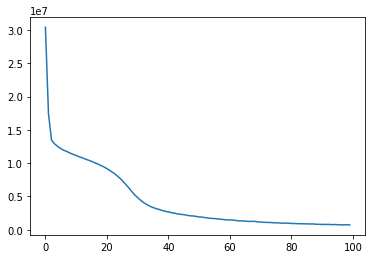

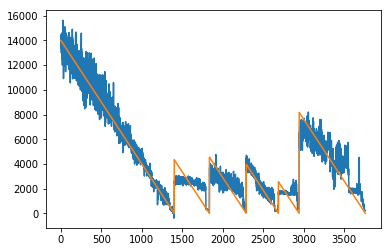

Epoch 1/150
3764/3764 [==============================] - 2s 502us/step - loss: 30307937.5345
Epoch 2/150
3764/3764 [==============================] - 1s 217us/step - loss: 16200531.1307
Epoch 3/150
3764/3764 [==============================] - 1s 228us/step - loss: 13125929.6015
Epoch 4/150
3764/3764 [==============================] - 1s 219us/step - loss: 12605668.5143
Epoch 5/150
3764/3764 [==============================] - 1s 216us/step - loss: 12220208.8502
Epoch 6/150
3764/3764 [==============================] - 1s 210us/step - loss: 11975590.4633
Epoch 7/150
3764/3764 [==============================] - 1s 189us/step - loss: 11719916.1562
Epoch 8/150
3764/3764 [==============================] - 1s 179us/step - loss: 11489801.1116
Epoch 9/150
3764/3764 [==============================] - 1s 179us/step - loss: 11263157.3666
Epoch 10/150
3764/3764 [==============================] - 1s 179us/step - loss: 11064141.9469
Epoch 11/150
3764/3764 [==============================] - 1s 174us/st

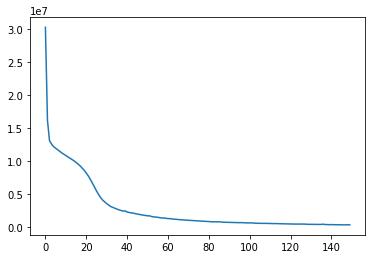

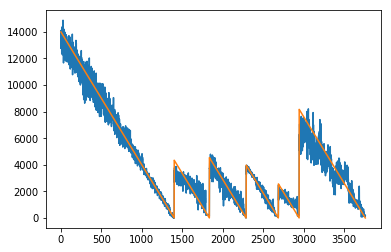

In [9]:
for epochs in epochss:
    rulModel, history = util.trainModel(X_train, Y_train, layersizes, epochs, expName)

##################
# Test: 1_3
##################
1802/1802 [==============================] - 1s 346us/step


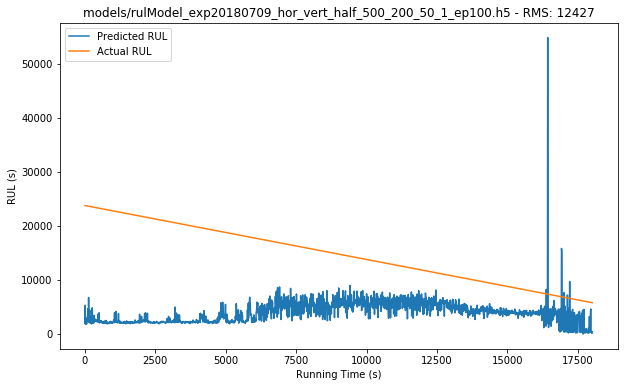

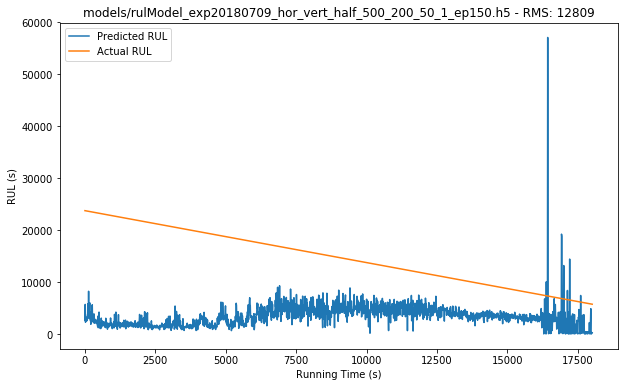

##################
# Test: 1_4
##################
1139/1139 [==============================] - 1s 536us/step


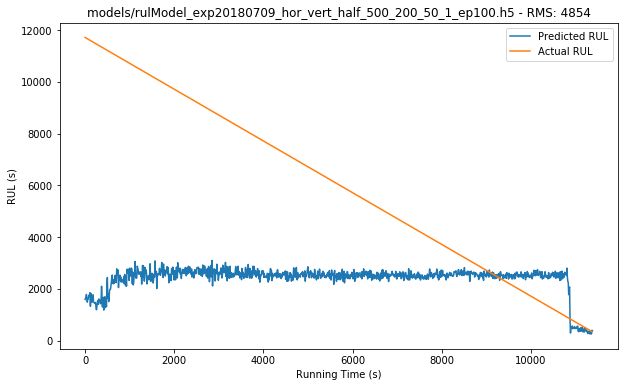

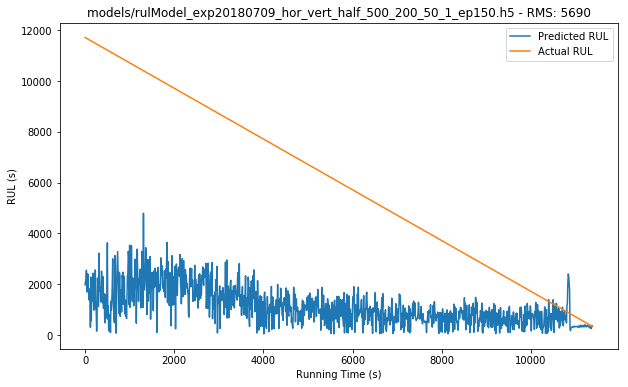

##################
# Test: 1_5
##################
2302/2302 [==============================] - 1s 340us/step


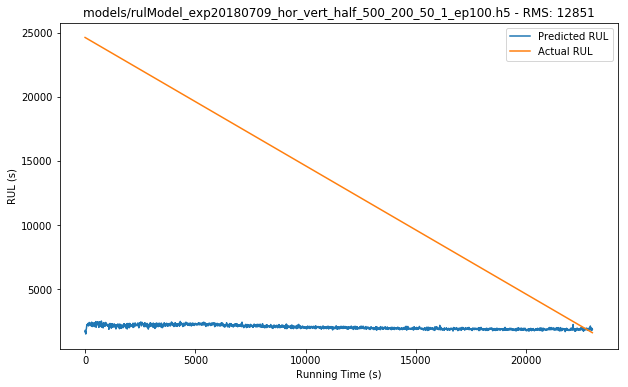

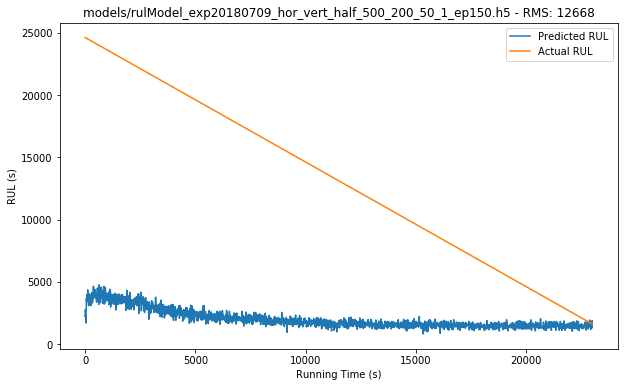

##################
# Test: 1_6
##################
2302/2302 [==============================] - 1s 339us/step


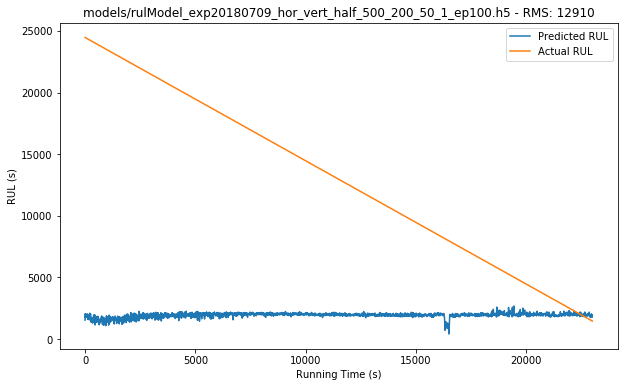

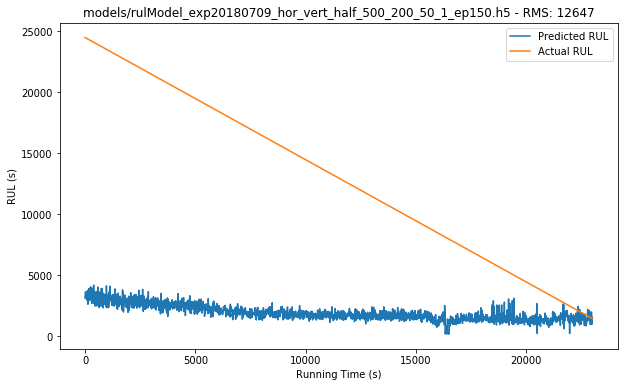

##################
# Test: 1_7
##################
1502/1502 [==============================] - 1s 475us/step


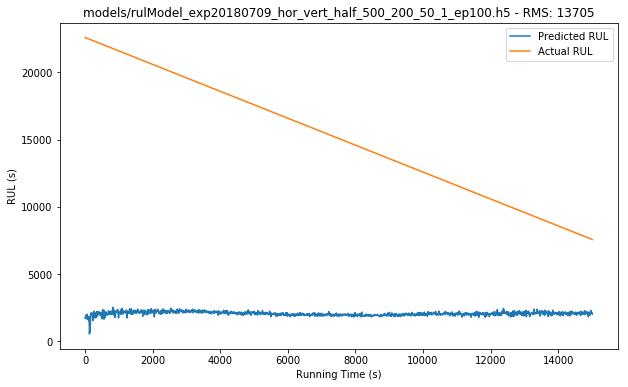

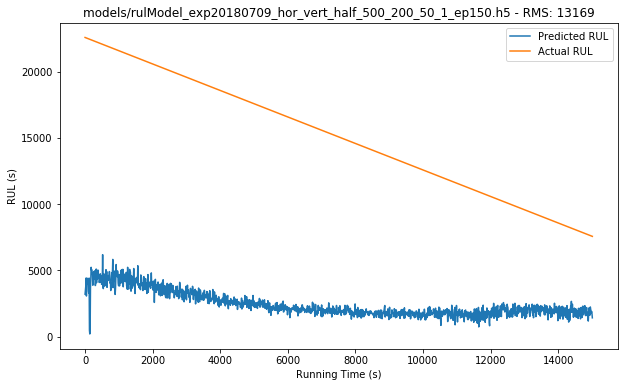

##################
# Test: 2_3
##################
1202/1202 [==============================] - 1s 668us/step


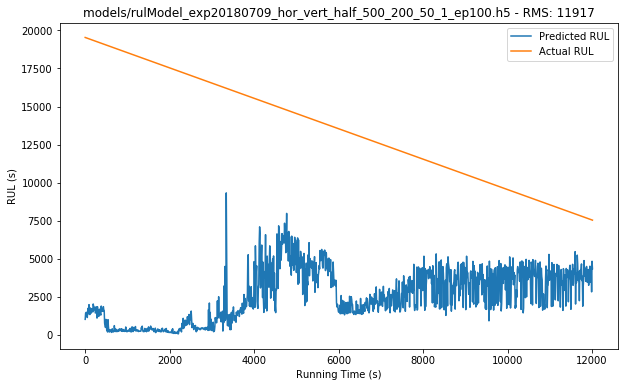

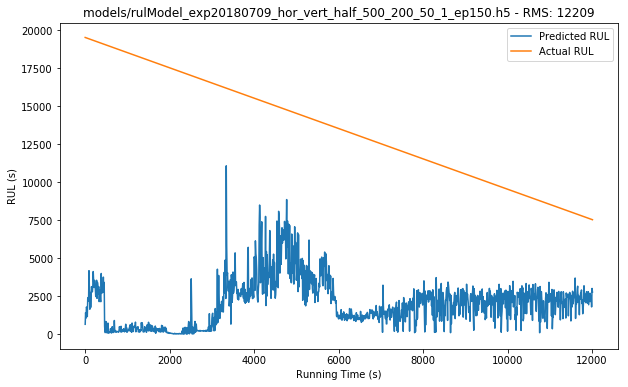

##################
# Test: 2_4
##################
612/612 [==============================] - 1s 1ms/step


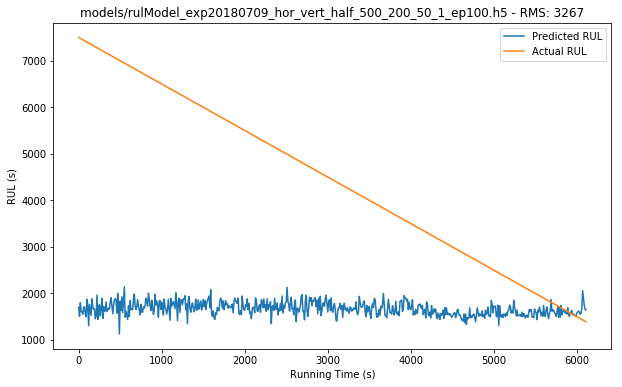

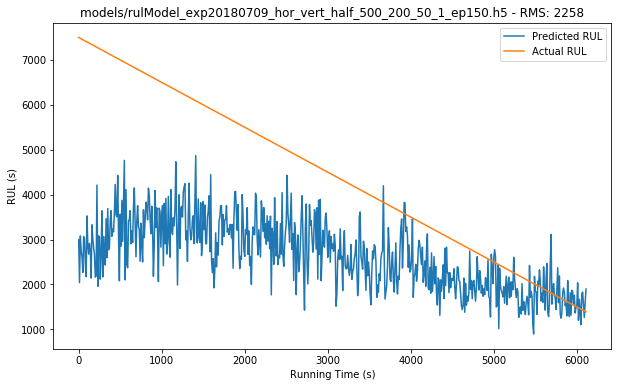

##################
# Test: 2_5
##################
2002/2002 [==============================] - 1s 462us/step


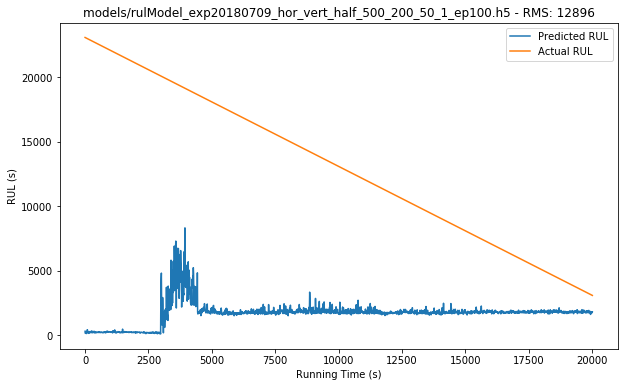

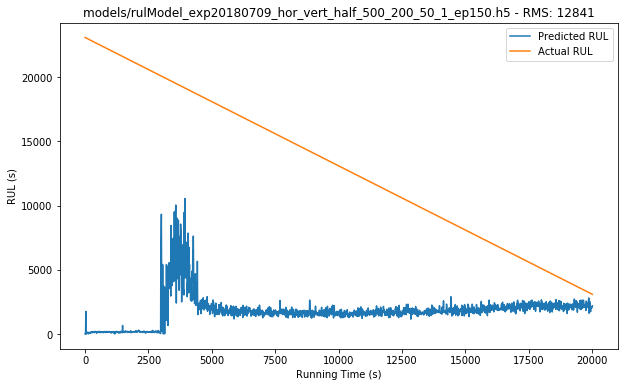

##################
# Test: 2_6
##################
572/572 [==============================] - 1s 2ms/step


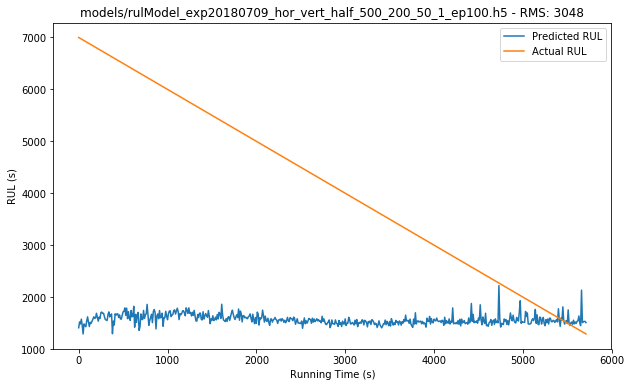

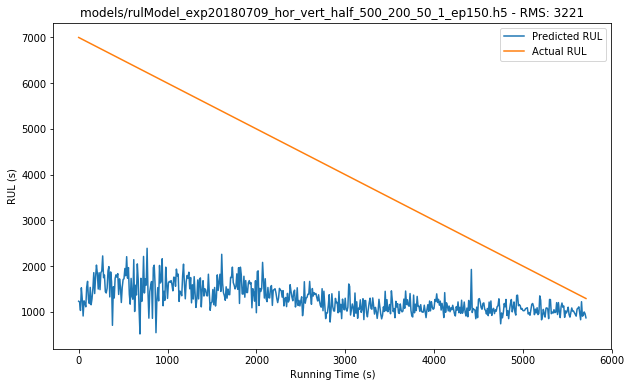

##################
# Test: 2_7
##################
172/172 [==============================] - 1s 5ms/step


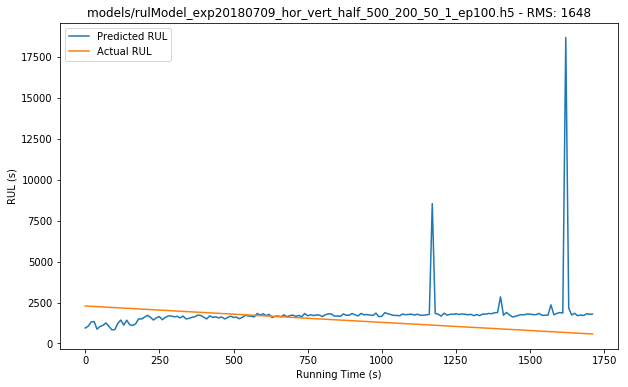

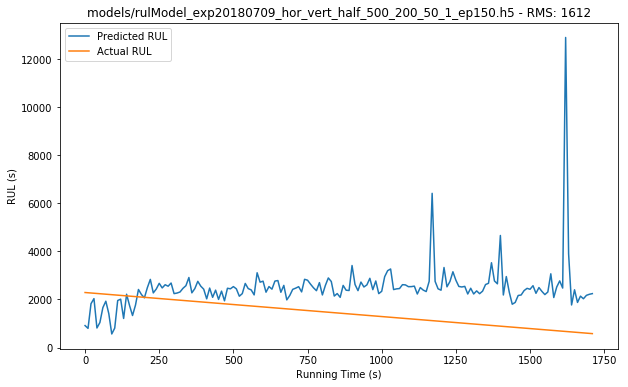

##################
# Test: 3_3
##################
352/352 [==============================] - 1s 2ms/step


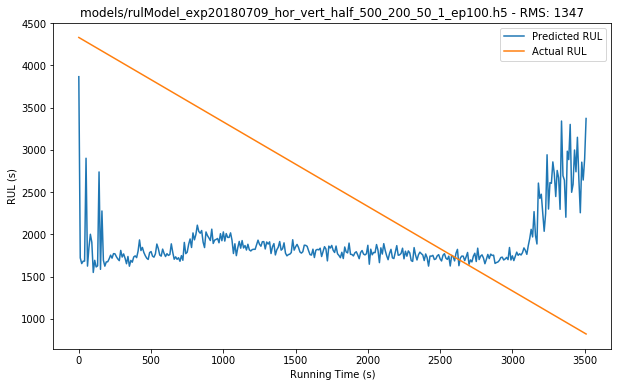

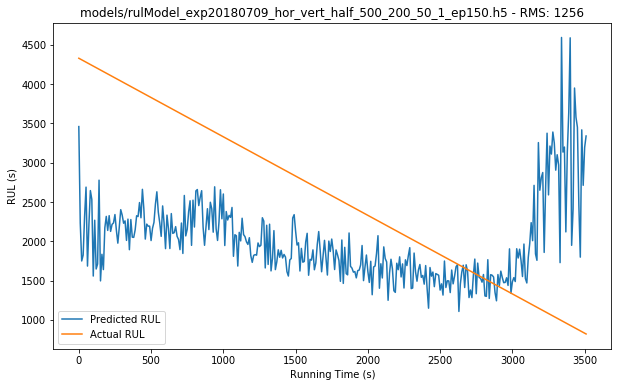

In [10]:
for testIndex in range(len(testspecs)):
    print('##################\n# Test: {:s}\n##################'.format(testspecs[testIndex][0]))
    actRUL =  testspecs[testIndex][1]
    testSpectro = np.concatenate((spectros_test_hor[testIndex], spectros_test_vert[testIndex]), axis=1)
    modelnames = [util.getModelName(layersizes, epochs, expName) for epochs in epochss]
    util.evaluate_spectro(modelnames, testSpectro, actRUL)

## Nog weer andere experimenten

Epoch 1/100
3764/3764 [==============================] - 3s 889us/step - loss: 31028052.3061
Epoch 2/100
3764/3764 [==============================] - 1s 311us/step - loss: 21997076.7630
Epoch 3/100
3764/3764 [==============================] - 1s 252us/step - loss: 13715422.7168
Epoch 4/100
3764/3764 [==============================] - 1s 198us/step - loss: 13119005.4867
Epoch 5/100
3764/3764 [==============================] - 1s 168us/step - loss: 12744142.6716
Epoch 6/100
3764/3764 [==============================] - 1s 160us/step - loss: 12459215.8108
Epoch 7/100
3764/3764 [==============================] - 1s 160us/step - loss: 12231966.8618
Epoch 8/100
3764/3764 [==============================] - 1s 159us/step - loss: 12028720.6429
Epoch 9/100
3764/3764 [==============================] - 1s 172us/step - loss: 11857818.5058
Epoch 10/100
3764/3764 [==============================] - 1s 156us/step - loss: 11694725.2965
Epoch 11/100
3764/3764 [==============================] - 1s 155us/st

Epoch 89/100
3764/3764 [==============================] - 1s 173us/step - loss: 1270291.1609
Epoch 90/100
3764/3764 [==============================] - 1s 165us/step - loss: 1214942.6722
Epoch 91/100
3764/3764 [==============================] - 1s 163us/step - loss: 1207724.6793
Epoch 92/100
3764/3764 [==============================] - 1s 161us/step - loss: 1197681.7670
Epoch 93/100
3764/3764 [==============================] - 1s 166us/step - loss: 1181348.9168
Epoch 94/100
3764/3764 [==============================] - 1s 166us/step - loss: 1169526.1537
Epoch 95/100
3764/3764 [==============================] - 1s 196us/step - loss: 1143846.1735
Epoch 96/100
3764/3764 [==============================] - 1s 188us/step - loss: 1133489.1560
Epoch 97/100
3764/3764 [==============================] - 1s 192us/step - loss: 1115080.7176
Epoch 98/100
3764/3764 [==============================] - 1s 277us/step - loss: 1099582.1923
Epoch 99/100
3764/3764 [==============================] - 1s 206us/ste

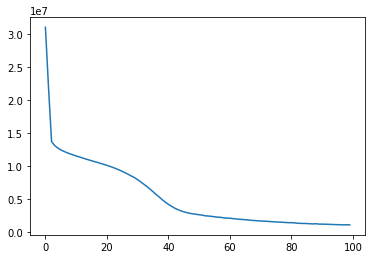

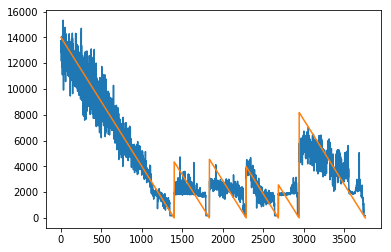

Epoch 1/150
3764/3764 [==============================] - 3s 776us/step - loss: 30341920.9150
Epoch 2/150
3764/3764 [==============================] - 1s 191us/step - loss: 17034187.2094
Epoch 3/150
3764/3764 [==============================] - 1s 177us/step - loss: 13177610.8661
Epoch 4/150
3764/3764 [==============================] - 1s 169us/step - loss: 12666737.7853
Epoch 5/150
3764/3764 [==============================] - 1s 166us/step - loss: 12302054.4772
Epoch 6/150
3764/3764 [==============================] - 1s 160us/step - loss: 12016447.7301
Epoch 7/150
3764/3764 [==============================] - 1s 170us/step - loss: 11765648.4453
Epoch 8/150
3764/3764 [==============================] - 1s 170us/step - loss: 11546154.6807
Epoch 9/150
3764/3764 [==============================] - 1s 162us/step - loss: 11327773.1116
Epoch 10/150
3764/3764 [==============================] - 1s 166us/step - loss: 11110609.8937
Epoch 11/150
3764/3764 [==============================] - 1s 173us/st

3764/3764 [==============================] - 1s 165us/step - loss: 1221231.1485
Epoch 90/150
3764/3764 [==============================] - 1s 165us/step - loss: 1188027.1938
Epoch 91/150
3764/3764 [==============================] - 1s 198us/step - loss: 1182196.0473
Epoch 92/150
3764/3764 [==============================] - 1s 187us/step - loss: 1143153.7976
Epoch 93/150
3764/3764 [==============================] - 1s 174us/step - loss: 1121936.5793
Epoch 94/150
3764/3764 [==============================] - 1s 173us/step - loss: 1114825.7165
Epoch 95/150
3764/3764 [==============================] - 1s 171us/step - loss: 1100881.9199
Epoch 96/150
3764/3764 [==============================] - 1s 168us/step - loss: 1071540.1467
Epoch 97/150
3764/3764 [==============================] - 1s 168us/step - loss: 1045438.3329
Epoch 98/150
3764/3764 [==============================] - 1s 166us/step - loss: 1035954.8394
Epoch 99/150
3764/3764 [==============================] - 1s 168us/step - loss: 101

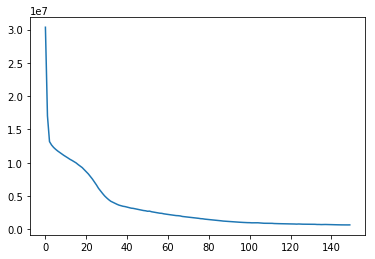

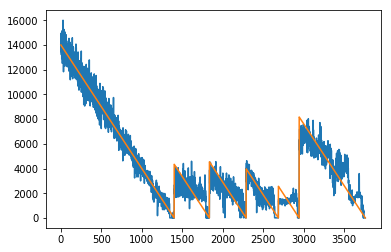

##################
# Test: 1_3
##################
1802/1802 [==============================] - 1s 675us/step


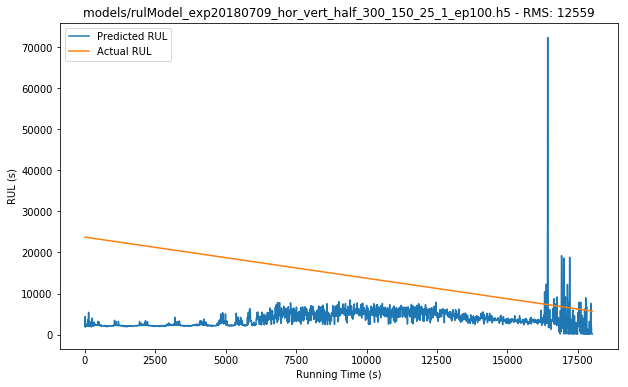

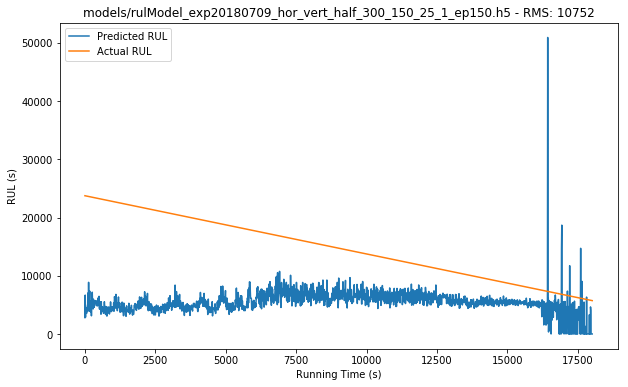

##################
# Test: 1_4
##################
1139/1139 [==============================] - 1s 952us/step


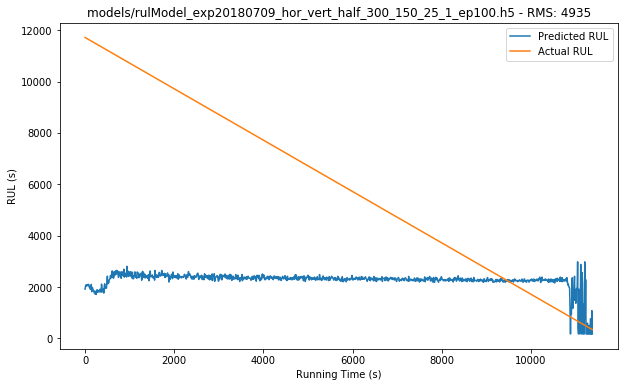

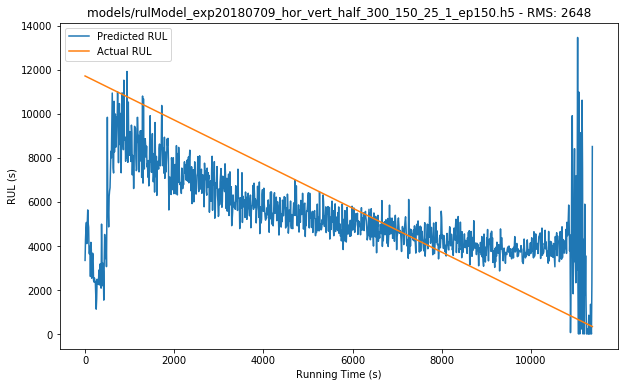

##################
# Test: 1_5
##################
2302/2302 [==============================] - 1s 507us/step


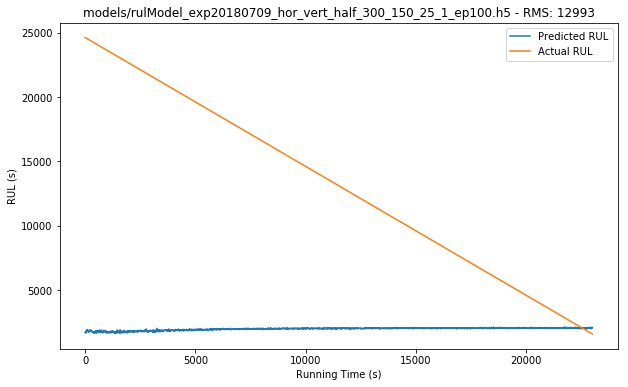

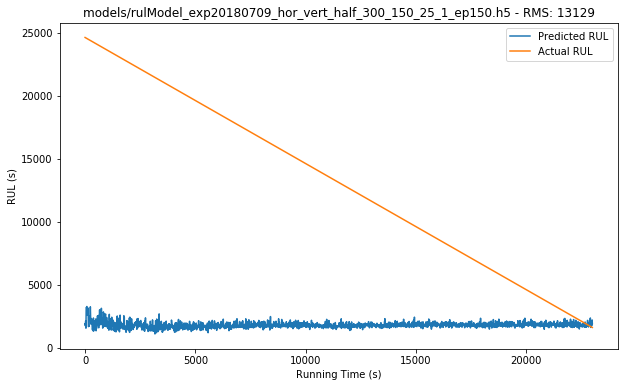

##################
# Test: 1_6
##################
2302/2302 [==============================] - 1s 556us/step


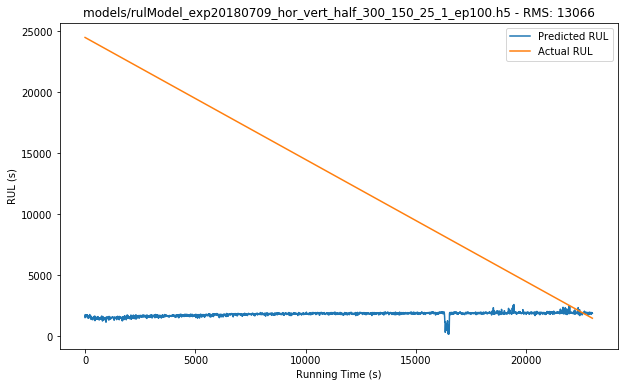

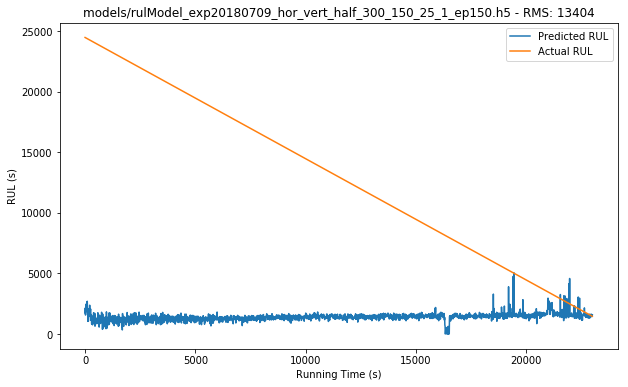

##################
# Test: 1_7
##################
1502/1502 [==============================] - 1s 924us/step


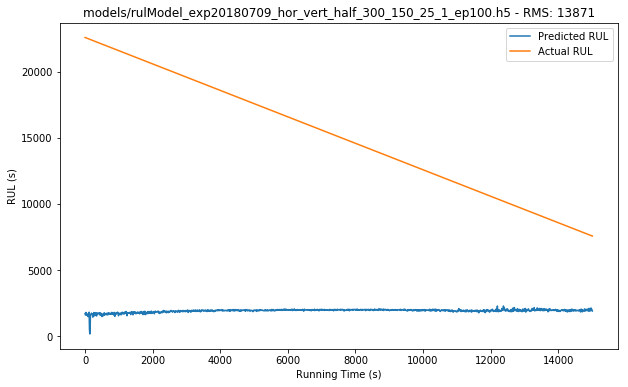

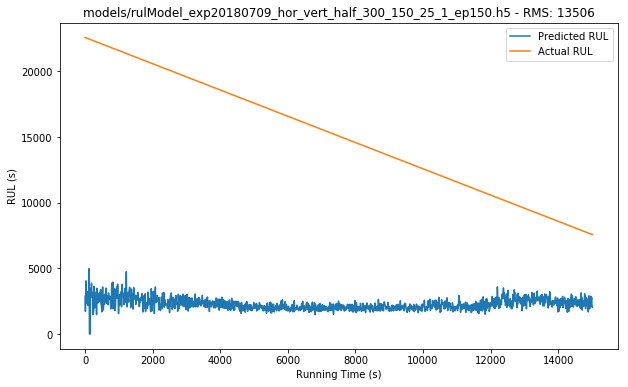

##################
# Test: 2_3
##################
1202/1202 [==============================] - 1s 1ms/step


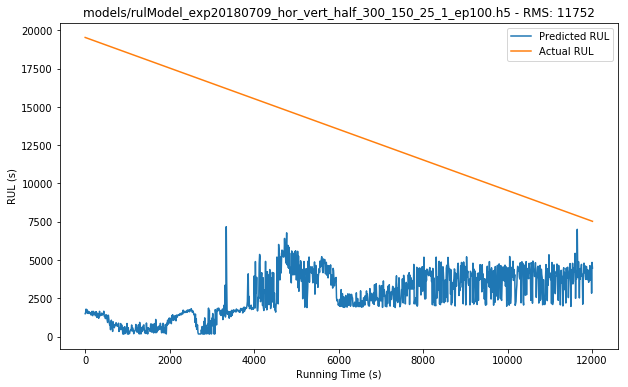

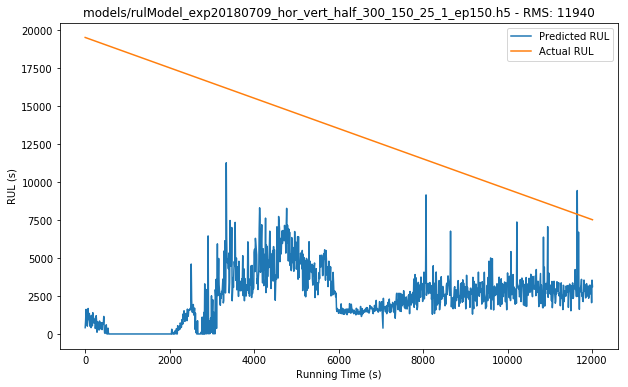

##################
# Test: 2_4
##################
612/612 [==============================] - 1s 2ms/step


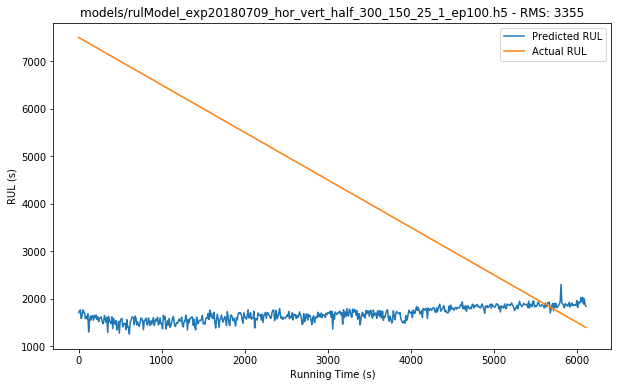

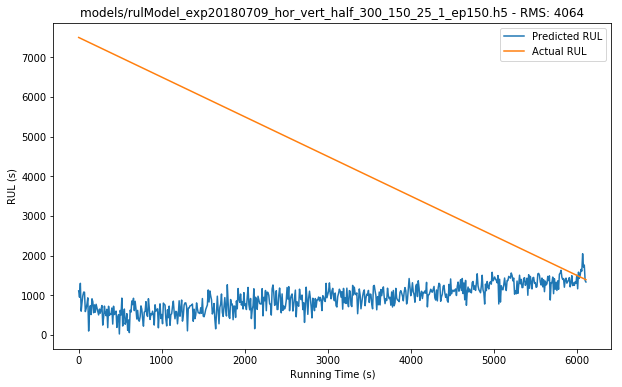

##################
# Test: 2_5
##################
2002/2002 [==============================] - 1s 690us/step


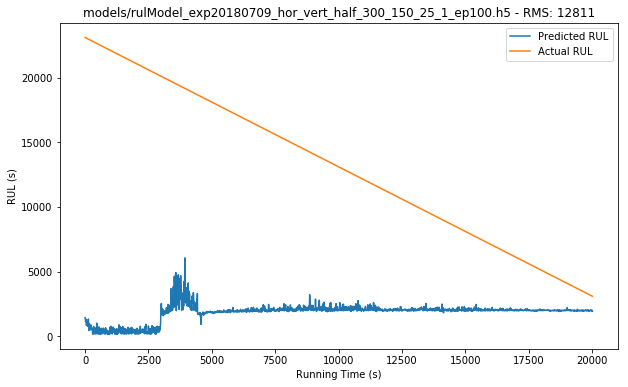

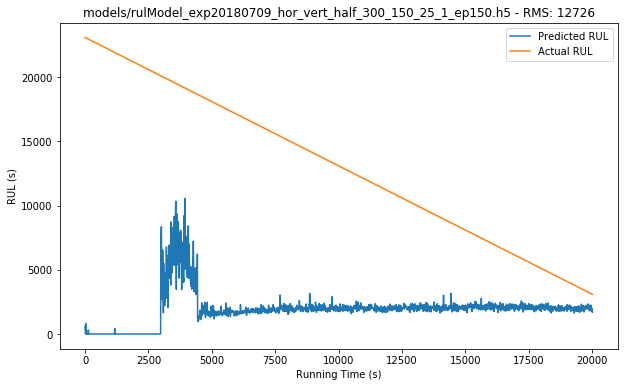

##################
# Test: 2_6
##################
572/572 [==============================] - 1s 2ms/step


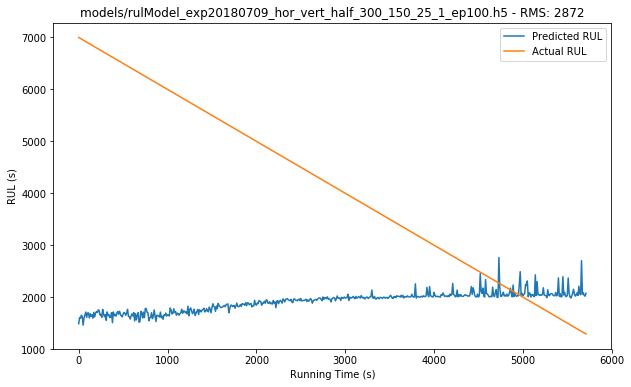

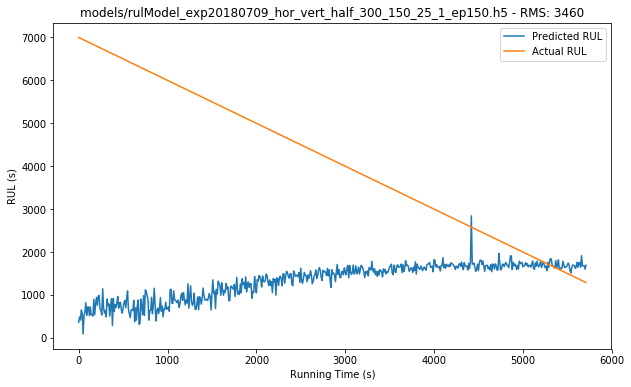

##################
# Test: 2_7
##################
172/172 [==============================] - 1s 7ms/step


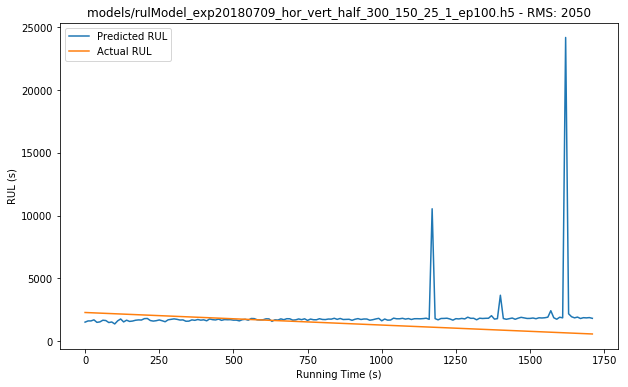

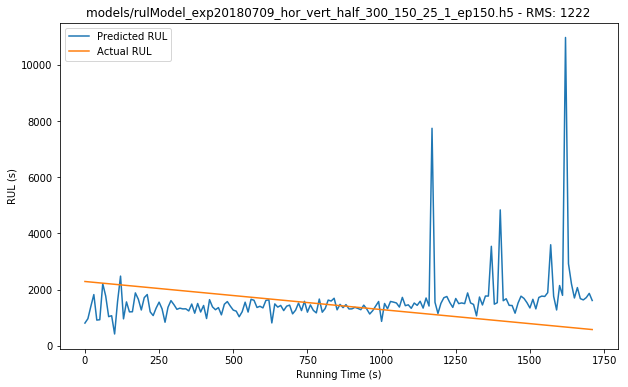

##################
# Test: 3_3
##################
352/352 [==============================] - 1s 4ms/step


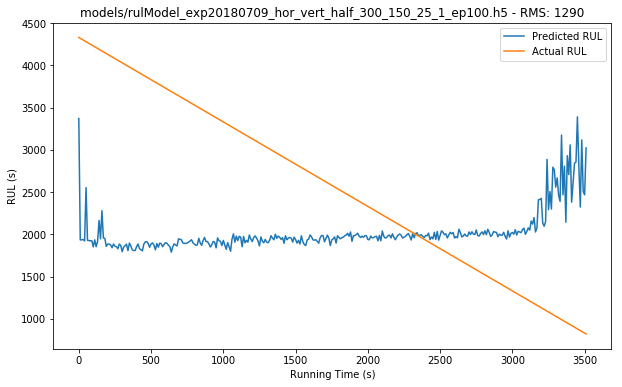

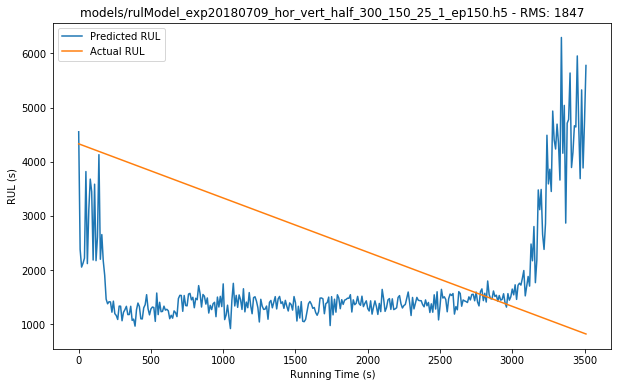

In [11]:
layersizes = [300,150,25]
epochss = [100, 150]
for epochs in epochss:
    rulModel, history = util.trainModel(X_train, Y_train, layersizes, epochs, expName)
    
for testIndex in range(len(testspecs)):
    print('##################\n# Test: {:s}\n##################'.format(testspecs[testIndex][0]))
    actRUL =  testspecs[testIndex][1]
    testSpectro = np.concatenate((spectros_test_hor[testIndex], spectros_test_vert[testIndex]), axis=1)
    modelnames = [util.getModelName(layersizes, epochs, expName) for epochs in epochss]
    util.evaluate_spectro(modelnames, testSpectro, actRUL)